In [1]:
import snntorch as snn
import sys
import platform
import torch
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import math

has_gpu = torch.cuda.is_available()
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"

print(f"Python Platform: {platform.platform()}")
print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

Python Platform: macOS-13.2.1-arm64-arm-64bit
PyTorch Version: 2.0.0.dev20230210

Python 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:38:11) 
[Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.1
GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


In [2]:
# imports
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import itertools

# Vanilla RNN Breakdown

- recurrent neural networks are unique in that they can accept variable length inputs and variable length outputs
- hidden state is a contextual vector that is passed from one time step to the next -> memory of the network which is recurrently fed back into the same network weights

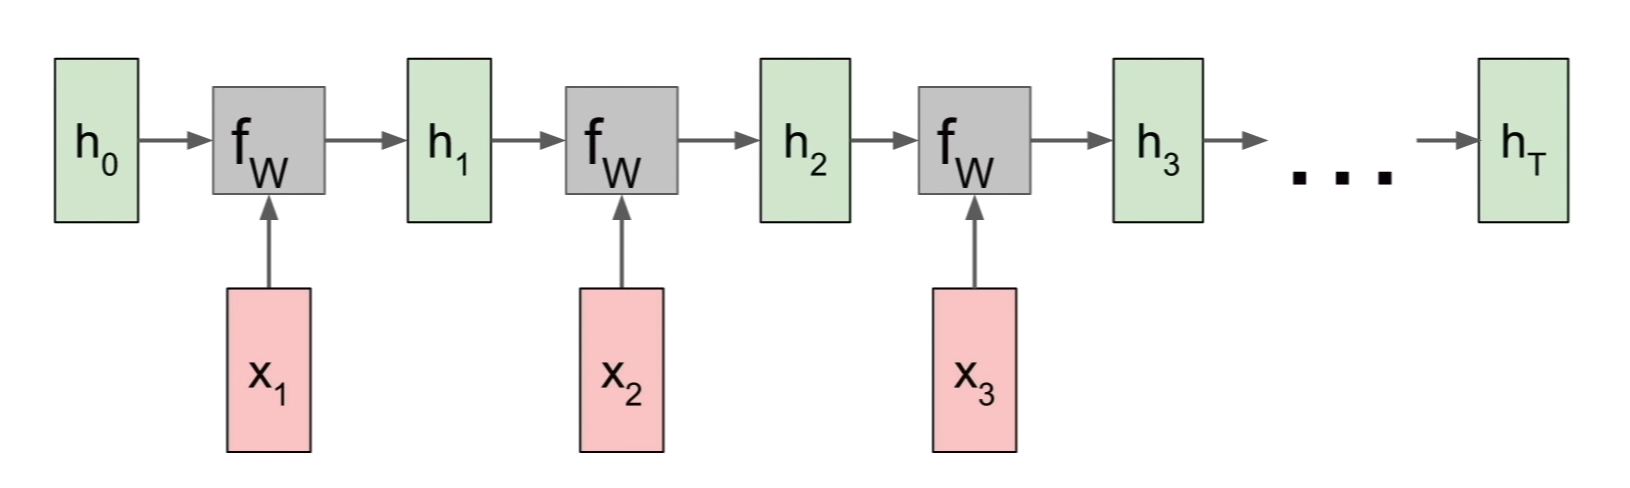

- hidden state begins as a 0-vector and fed into the network with the first input 
- updated hidden state is then fed back into the network with the next input
- the same weights are used for every time step of computation

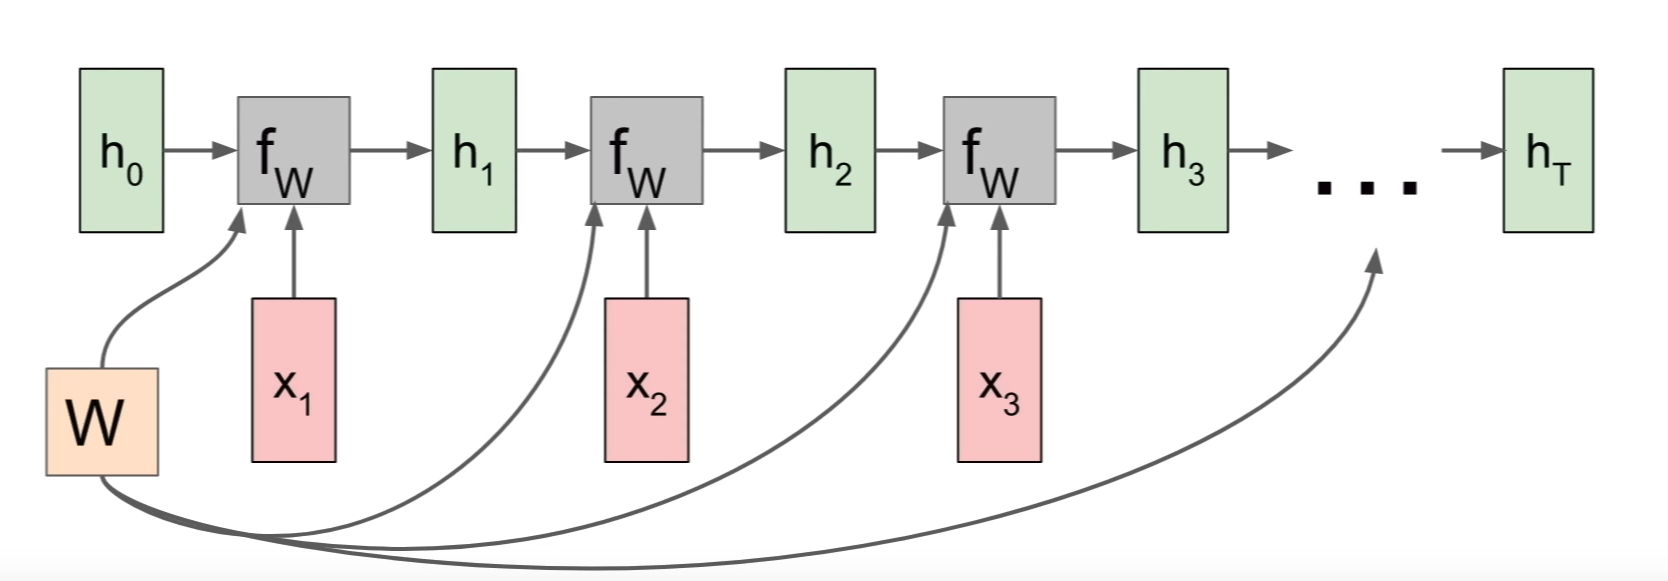





# Recurrent Representation of SNN

**Previously Derived Recursive Formula:**
$$ U[t+1] = \underbrace{\beta U[t]}_\text{decay} + \underbrace{WX[t+1]}_\text{input} - \underbrace{R[t]}_\text{reset} \tag{1} $$

where input synaptic current is interpreted as $I_{\rm in}[t] = WX[t]$, and $X[t]$ may be some arbitrary input of spikes, a step/time-varying voltage, or unweighted step/time-varying current